<a href="https://colab.research.google.com/github/Pmunde99/Image-Classification-on-Fashion-mnist-Dataset-using-CNN-/blob/main/CNN_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy  as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras 
from keras.models import *
from keras.layers import * 
from keras import datasets

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)    #we have 60000 labels in y_train

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [ ]:
x_train

In [ ]:
x_train[1]

In [ ]:
y_train[0]

9

In [ ]:
# Label Class      	Class
# 0   --------> 	T-shirt/top
# 1 	-------->   Trouser
# 2	 -------->    Pullover
# 3	 -------->    Dress
# 4	 -------->    Coat
# 5	 -------->    Sandal
# 6	  -------->   Shirt
# 7	  -------->   Sneaker
# 8	 -------->    Bag
# 9  -------->    Ankle boot  


class_labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

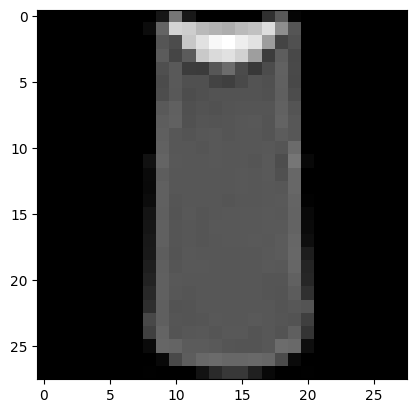

In [ ]:
plt.imshow(x_train[6], cmap='gray')

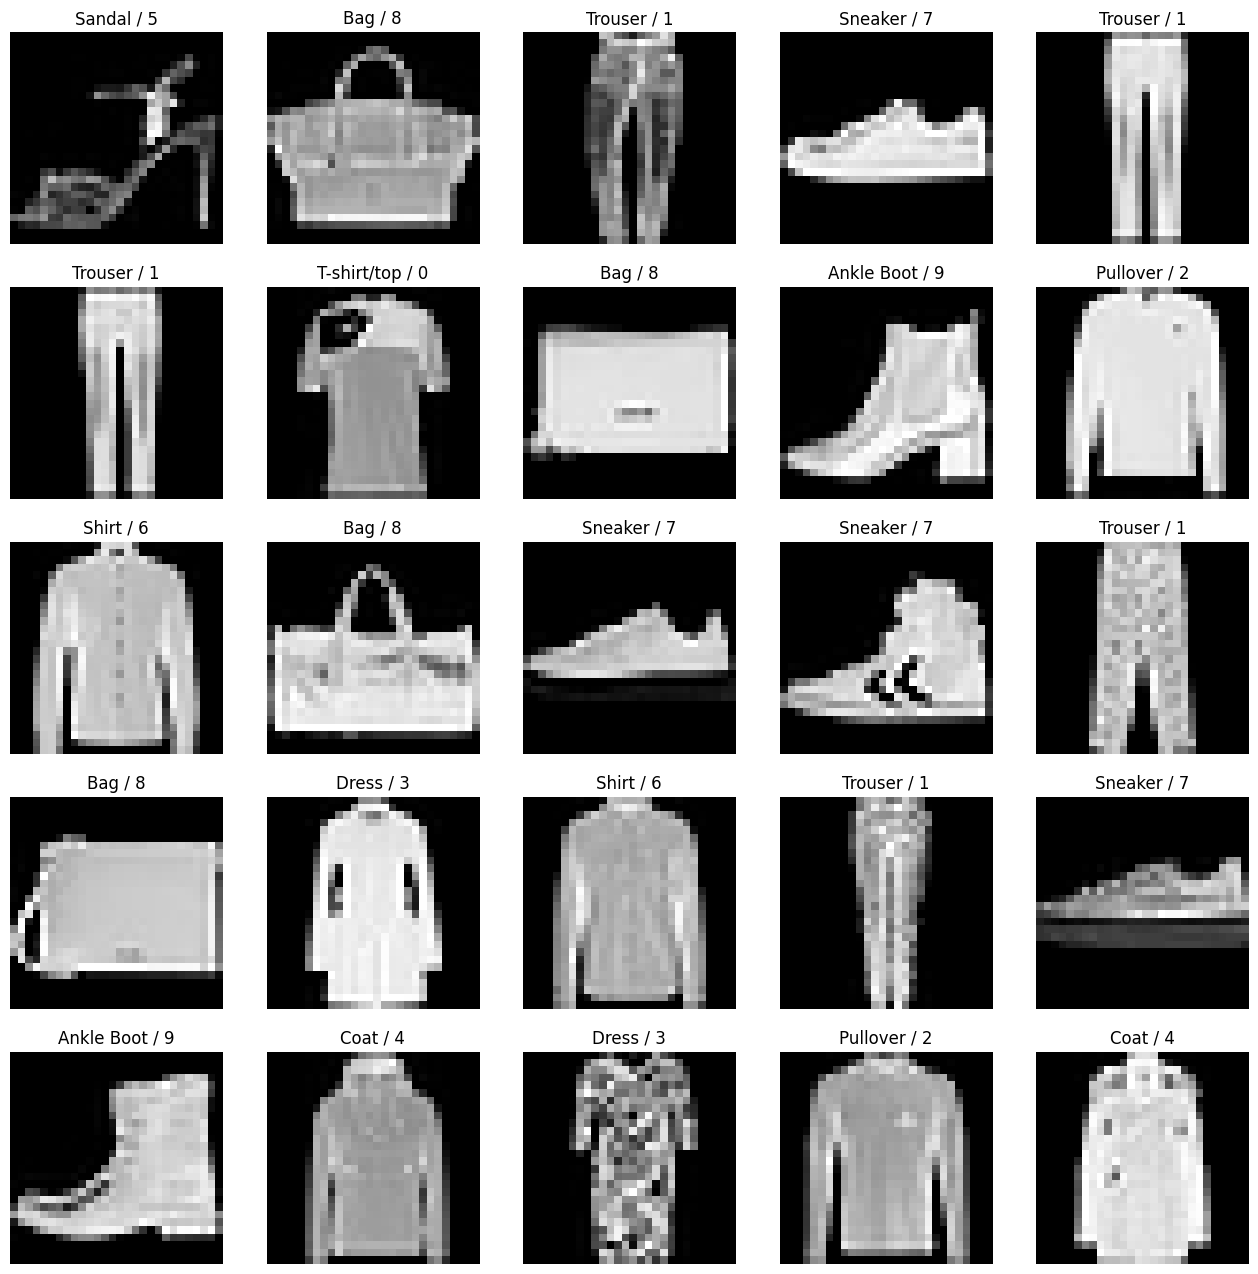

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i],cmap='gray')
  plt.axis("off")
  plt.title('{} / {}'  .format(class_labels[y_train[i]],y_train[i]))

In [ ]:
# WE give 4D images to CNN model

In [ ]:
x_train.ndim

3

In [ ]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [ ]:
x_train.ndim

4

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
#FEATURE SCALE (0 to 1)
x_train=x_train/255
x_test=x_test/255

In [ ]:
# SPLIT DATASET

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)


In [ ]:
model=Sequential()

model.add(Conv2D(filters=28,kernel_size=(3,3),strides=(1,1),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 1, 1, 128)       

In [ ]:
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1,validation_data=(x_val,y_val))

Epoch 1/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7056 - accuracy: 0.7374 - val_loss: 0.6696 - val_accuracy: 0.7478
Epoch 2/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6225 - accuracy: 0.7684 - val_loss: 0.5939 - val_accuracy: 0.7762
Epoch 3/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5736 - accuracy: 0.7871 - val_loss: 0.5550 - val_accuracy: 0.7930
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5378 - accuracy: 0.7995 - val_loss: 0.5394 - val_accuracy: 0.7997
Epoch 5/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5108 - accuracy: 0.8094 - val_loss: 0.5077 - val_accuracy: 0.8122
Epoch 6/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4824 - accuracy: 0.8205 - val_loss: 0.4773 - val_accuracy: 0.8247
Epoch 7/15
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4605 - accuracy: 0.8300 - val_loss: 0.4748 - val_accuracy:

In [ ]:
#traning  data set  accuracy: 0.8681

In [ ]:
#TEST the model
model.predict(np.expand_dims(x_test[0],axis=0)).round()

1/1 [==============================] - 0s 21ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(x_test[0],axis=0)).round())

1/1 [==============================] - 0s 28ms/step


9

In [ ]:
y_test[0]

9

In [ ]:
y_pred=model.predict(x_test).round(2)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.16, 0.  , 0.84],
       [0.  , 0.  , 0.98, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.07, 0.08, 0.  ]], dtype=float32)

In [ ]:
model.evaluate(x_test,y_test)  #test dataset

313/313 [==============================] - 1s 3ms/step - loss: 0.3929 - accuracy: 0.8530


[0.3928878903388977, 0.8529999852180481]

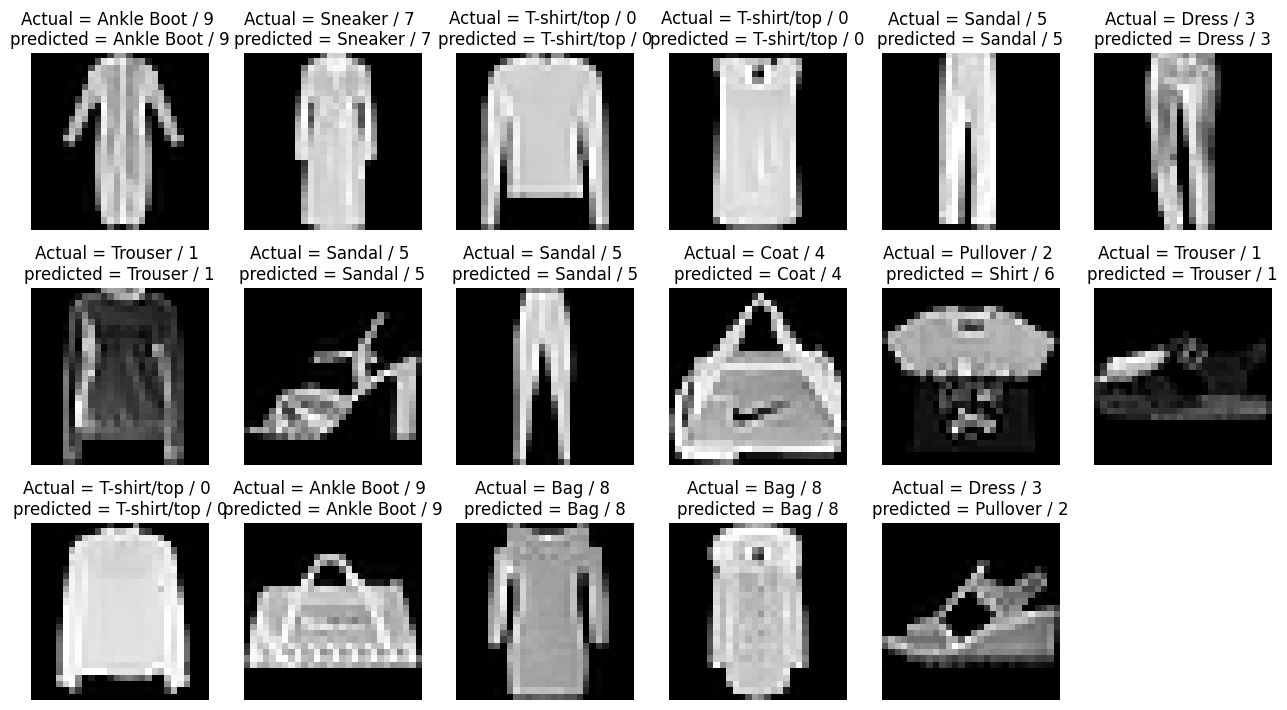

In [ ]:
plt.figure(figsize=(16,30))

j=1
for  i in range(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(x_train[i],cmap='gray')
  plt.title("Actual = {} / {} \npredicted = {} / {}".format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis("off")

<Axes: >

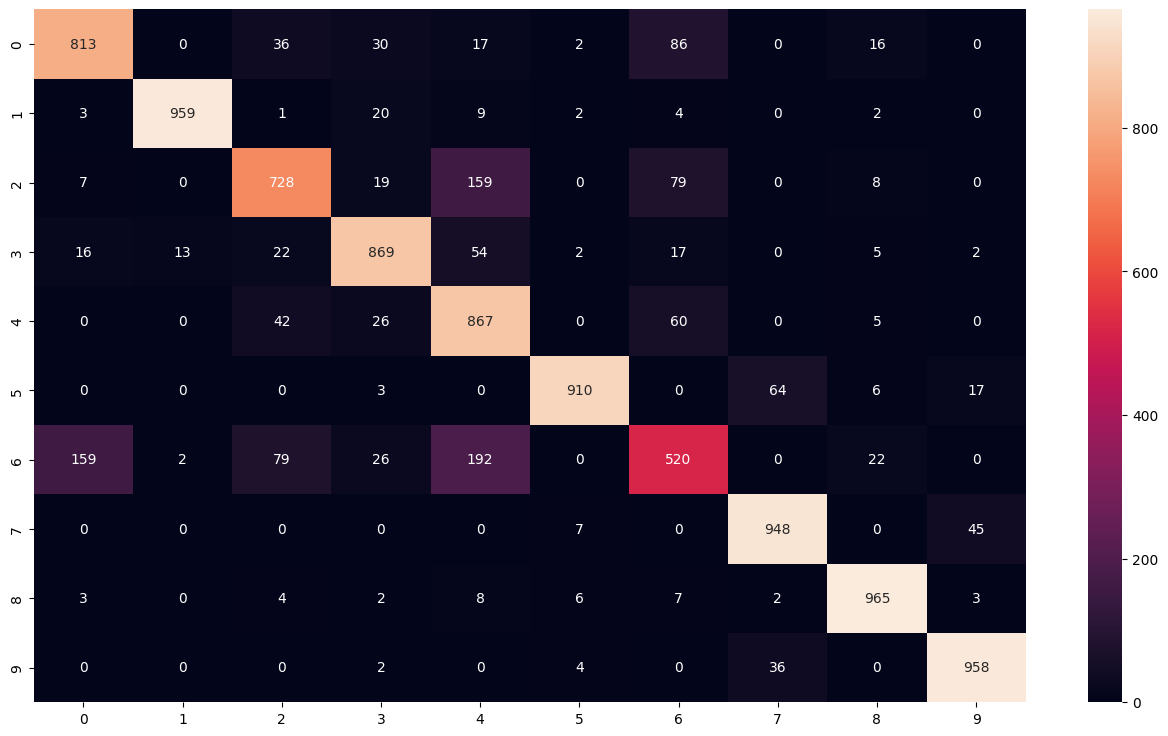

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)

sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.81      0.81      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.80      0.73      0.76      1000
       Dress       0.87      0.87      0.87      1000
        Coat       0.66      0.87      0.75      1000
      Sandal       0.98      0.91      0.94      1000
       Shirt       0.67      0.52      0.59      1000
     Sneaker       0.90      0.95      0.92      1000
         Bag       0.94      0.96      0.95      1000
  Ankle Boot       0.93      0.96      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

